

# NATURAL LANGUAGE PROCESSING


In [58]:

#data - https://archive.ics.uci.edu/ml/datasets/sms+spam+collection


In [59]:
import pandas as pd

import numpy as np



In [60]:

df = pd.read_csv('./smsspamcollection/SMSSpamCollection',
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [61]:
import pandas as pd

df = pd.read_table('./smsspamcollection/SMSSpamCollection',
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

In [62]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [63]:
df['label'] = df.label.map({'ham': 0, 'spam': 1})


In [64]:
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [65]:
df['message'] = df.message.map(lambda x: x.lower())


#NLP





In [66]:
df['message'] 

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object

In [67]:
df['message'] = df.message.str.replace('[^\w\s]', '')

df['message']


C:\Users\admin\AppData\Local\Temp\ipykernel_18948\901837998.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df.message.str.replace('[^\w\s]', '')


0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [68]:
# NLP processing

In [69]:
import nltk




In [70]:
#Do ONCE ONLY

#nltk.download()




In [71]:
df['message'] = df['message'].apply(nltk.word_tokenize)


In [72]:
df['message']

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [73]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
 
df['message'] = df['message'].apply(lambda x: [stemmer.stem(i) for i in x])

In [74]:
df['message']

0       [go, until, jurong, point, crazi, avail, onli,...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, in, 2, a, wkli, comp, to, win, f...
3       [u, dun, say, so, earli, hor, u, c, alreadi, t...
4       [nah, i, dont, think, he, goe, to, usf, he, li...
                              ...                        
5567    [thi, is, the, 2nd, time, we, have, tri, 2, co...
5568             [will, ü, b, go, to, esplanad, fr, home]
5569    [piti, wa, in, mood, for, that, soani, other, ...
5570    [the, guy, did, some, bitch, but, i, act, like...
5571                       [rofl, it, true, to, it, name]
Name: message, Length: 5572, dtype: object

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
df['message'] = df['message'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['message'])

In [76]:
counts

<5572x8169 sparse matrix of type '<class 'numpy.int64'>'
	with 72500 stored elements in Compressed Sparse Row format>

In [79]:
counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [78]:
import numpy as np 
import sys

np.set_printoptions(threshold=10)#sys.maxsize)

In [ ]:
counts.toarray()


In [80]:
from sklearn.feature_extraction.text import TfidfTransformer


#Tfidf  -- TERM FREQUENCY  -- INVERSE DOCUMENNT FREQUNCY

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

In [81]:
counts

<5572x8169 sparse matrix of type '<class 'numpy.float64'>'
	with 72500 stored elements in Compressed Sparse Row format>

In [82]:
counts.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
counts.data.shape

In [83]:
#5572 * 8145

#Pandas Dataframe # DENSE   ---- numpy sparse matrix
#45 million


In [ ]:
#MODEL TRAINING

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], random_state=100,test_size=0.1)

In [86]:
pd.DataFrame(X_train)

,0
0,"(0, 7781)\t0.19643988827560915\n (0, 7733)\..."
1,"(0, 7769)\t0.14272466003326395\n (0, 7733)\..."
2,"(0, 8113)\t0.22495292458041882\n (0, 7803)\..."
3,"(0, 7942)\t0.1843688293015568\n (0, 7538)\t..."
4,"(0, 8113)\t0.22030228575605146\n (0, 7146)\..."
...,...
5009,"(0, 8130)\t0.09272243745328486\n (0, 7869)\..."
5010,"(0, 6969)\t0.4693241643632138\n (0, 4358)\t..."
5011,"(0, 8113)\t0.12371781985410453\n (0, 6285)\..."
5012,"(0, 7130)\t0.2247699720642763\n (0, 7109)\t..."


<5014x8169 sparse matrix of type '<class 'numpy.float64'>'
	with 65321 stored elements in Compressed Sparse Row format>

In [87]:
# import the logistic regressor for CLASSIFICATION

from sklearn.linear_model import LogisticRegression

#REGULARIZATION--- L2 ridge
#L1 --LASSO




classify = LogisticRegression(C=1,random_state=100, max_iter=5000, 
                                 penalty='l1', solver='saga') 

classify

LogisticRegression(C=1, max_iter=5000, penalty='l1', random_state=100,
                   solver='saga')

In [88]:
 
classify.fit(X_train, y_train) #training the algorithm

classify

LogisticRegression(C=1, max_iter=5000, penalty='l1', random_state=100,
                   solver='saga')

In [89]:
#To retrieve the intercept:
print(classify.intercept_)
#For retrieving the slope:
print(classify.coef_)

[-3.25870226]
[[0. 0. 0. ... 0. 0. 0.]]


In [91]:
#train accuracy score
classify.score(X_train,y_train)


0.9696848823294775

In [92]:
#test accuracy score
classify.score(X_test,y_test)
#0.9473684210526315

0.953405017921147

In [94]:
y_pred=classify.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [95]:
dataset=classify.predict_proba(X_test)
dataset


array([[0.71573144, 0.28426856],
       [0.99788331, 0.00211669],
       [0.3251086 , 0.6748914 ],
       ...,
       [0.99400465, 0.00599535],
       [0.94465902, 0.05534098],
       [0.97498584, 0.02501416]])

In [96]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,y_pred ))


[[476   0]
 [ 26  56]]


<AxesSubplot: >

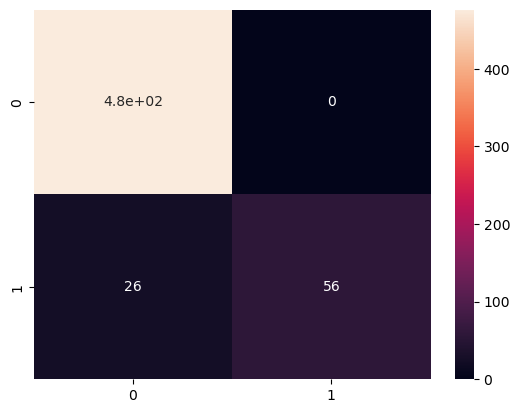

In [97]:

import seaborn as sns

sns.heatmap(metrics.confusion_matrix(y_test,y_pred ),annot=True)


In [98]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       476
           1       1.00      0.68      0.81        82

    accuracy                           0.95       558
   macro avg       0.97      0.84      0.89       558
weighted avg       0.96      0.95      0.95       558

